## Part 1:

Gather the dataset of hubNashville requests from https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh. For this project, you should look at requests with Request Type of "COVID-19" and Subrequest Type of "COVID-19 Violations". Explore this dataset, looking at when and where these violations occurred.



In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#getting data from API, case_requests = COVID-19 and setting limit to 25k

url = 'https://data.nashville.gov/resource/7qhx-rexh.json?case_request=COVID-19&$limit=25000'

response = requests.get(url)

In [3]:
#reading the json text to dataframe

hubNashville = pd.read_json(response.text)

In [4]:
#subsetting for case_requests and case_subrequest

hubNashville = hubNashville[hubNashville['case_subrequest'] == 'COVID-19 Violations']

In [5]:
hubNashville.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11676 entries, 2 to 15999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   case_number                11676 non-null  int64  
 1   status                     11676 non-null  object 
 2   case_request               11676 non-null  object 
 3   case_subrequest            11676 non-null  object 
 4   additional_subrequest      11667 non-null  object 
 5   date_time_opened           11676 non-null  object 
 6   date_time_closed           11646 non-null  object 
 7   case_origin                11676 non-null  object 
 8   state_issue                11676 non-null  object 
 9   closed_when_created        11676 non-null  object 
 10  incident_address           11400 non-null  object 
 11  latitude                   11398 non-null  float64
 12  longitude                  11398 non-null  float64
 13  mapped_location            11398 non-null  obj

In [6]:
#converting open and close to datetime

hubNashville['date_time_opened'] = [pd.to_datetime(d) for d in hubNashville['date_time_opened']]
hubNashville['date_time_closed'] = [pd.to_datetime(d) for d in hubNashville['date_time_closed']]

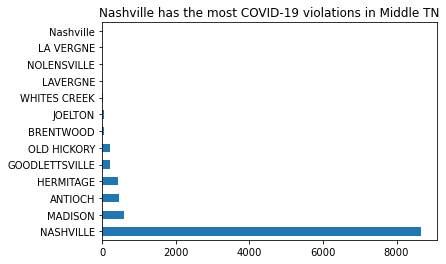

In [7]:
hubNashville['incident_city'].value_counts().plot(kind='barh', 
                                                  title='Nashville has the most COVID-19 violations in Middle TN');

Nashville leads the number of violations with ____

In [8]:
hubNashville['date_time_opened'].dt.strftime('%Y-%m-%d')

2        2020-11-06
3        2020-11-07
5        2020-11-06
7        2020-11-06
8        2020-11-06
            ...    
15995    2020-04-01
15996    2020-04-01
15997    2020-03-31
15998    2020-03-31
15999    2020-03-31
Name: date_time_opened, Length: 11676, dtype: object

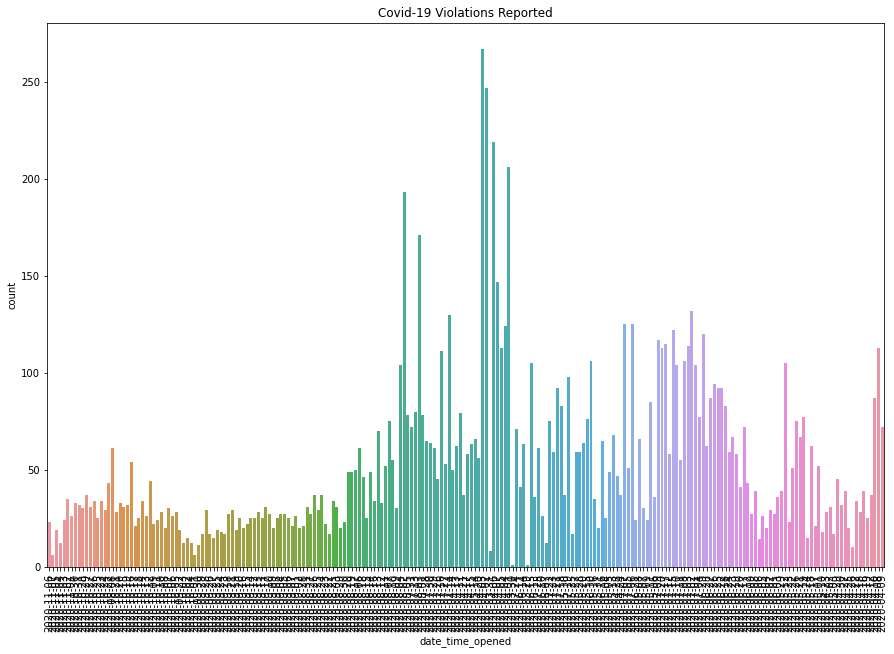

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
data = hubNashville['date_time_opened'].dt.strftime('%Y-%m-%d')
sns.countplot(data)
plt.xticks(rotation='vertical')
plt.title('Covid-19 Violations Reported');

In [10]:
#creating new column with value_counts
hubNashville['opened_year_month_date'] = hubNashville['date_time_opened'].dt.strftime('%Y-%m-%d')

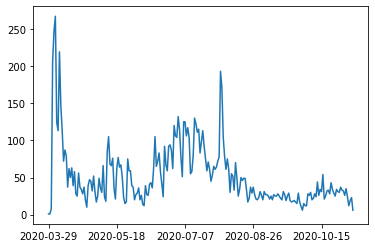

In [11]:
hubNashville['opened_year_month_date'].value_counts().sort_index().plot();

In [12]:
violations_by_day = hubNashville.groupby('opened_year_month_date').size().to_frame('count')
violations_by_day

,count
opened_year_month_date,
2020-03-29,1
2020-03-30,1
2020-03-31,8
2020-04-01,206
2020-04-02,247
...,...
2020-11-03,24
2020-11-04,12
2020-11-05,19


## Part 2:
The file davidson_cases.csv contains the number of COVID cases in Davidson county per day from March 8 through October 29. Use this dataset to compare the trend for the number of cases over time to the number of reported violations. Feel free to add any additional data that you think might be useful.

In [13]:
davidsonco_cases = pd.read_csv('../data/davidson_cases.csv')
davidsonco_cases.head()

,date,county,state,fips,cases,deaths
0,2020-03-08,Davidson,Tennessee,47037,1,0
1,2020-03-09,Davidson,Tennessee,47037,1,0
2,2020-03-10,Davidson,Tennessee,47037,1,0
3,2020-03-11,Davidson,Tennessee,47037,2,0
4,2020-03-12,Davidson,Tennessee,47037,6,0


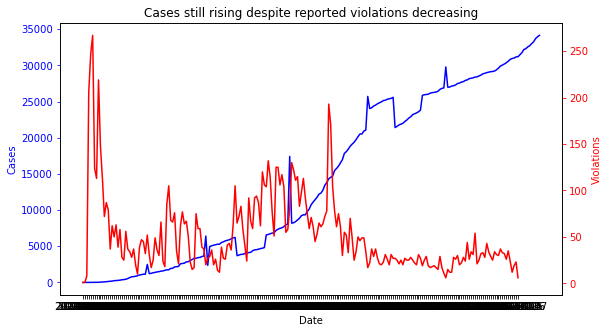

In [14]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(davidsonco_cases['date'], davidsonco_cases['cases'], 
           color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Cases', color='blue')
ax.tick_params('y', colors='blue')
ax2 = ax.twinx()
ax2.plot(violations_by_day.index, violations_by_day['count'],          
         color='red')
ax2.set_ylabel('Violations', color='red')
ax2.tick_params('y', colors='red')
plt.title('Cases still rising despite reported violations decreasing');

## Part 3:
The Metro Public Health Department tracks COVID-19 clusters. The files clusters.csv and clusters_by_type.csv contain the tables of clusters as reported by WSMV along with the coordinates of the clusters. Can you find any connection between the reported COVID violations and subsequent COVID clusters?

In [18]:
clusters = pd.read_csv('../data/clusters.csv')

In [20]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cluster Name        62 non-null     object 
 1   Facility Type       62 non-null     object 
 2   Cluster Start Date  62 non-null     object 
 3   # Cases             62 non-null     int64  
 4   Latitude            52 non-null     float64
 5   Longitude           52 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ KB


In [29]:
#replacing errant comma value 
clusters.at[29, 'Longitude'] = '-86.7779142'
clusters.at[29, 'Longitude']

'-86.7779142'

In [31]:
clusters['Longitude'] = clusters['Longitude'].astype(float)

In [22]:
clusters_by_type = pd.read_csv('../data/clusters_by_type.csv')
clusters_by_type

,Cluster Type,Number of Clusters
0,Bar,7
1,Church,2
2,College / University,5
3,Commercial-Warehouse,12
4,Congregate Living,13
5,Construction,19
6,Correctional Facility,9
7,Day Care,7
8,Food Production,2
9,Grocery,1


In [36]:
violations_clusters = hubNashville.merge(clusters, left_on=['latitude', 'longitude'], 
                                         right_on=['Latitude', 'Longitude'])

In [40]:
clusters

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.125891,-86.822863
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.846772
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.819533
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.756749
...,...,...,...,...,...,...
57,One Stone Church Service,Church,9/22/2020,10,36.189960,-86.767338
58,Miss Kelli's,Bar,10/1/2020,14,36.164369,-86.780704
59,Nashville Rescue Mission - Women's Campus,Congregate Living,10/1/2020,70,36.167693,-86.795756
60,Link Systems Electric,Other,10/16/2020,12,36.092924,-86.743873
